In [1]:
# Imports & Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn and matplotlib style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

# Paths
metrics_path = "../data/results/metrics/ablation_metrics.csv"
dm_path = "../data/results/metrics/ablation_dm_test.csv"

# Load data
results_df = pd.read_csv(metrics_path)
dm_df = pd.read_csv(dm_path)
TICKERS = results_df["Ticker"].unique().tolist()

display(results_df.head())


,Ticker,Fold,Model,RMSE,Accuracy,Sharpe
0,AAPL,1,Technical,0.819558,0.792952,3.708372
1,AAPL,1,Fundamental,0.045951,0.453744,-0.583469
2,AAPL,1,Sentiment,0.046369,0.453744,-0.583469
3,AAPL,1,TFMS,0.039548,0.735683,1.224180
4,AAPL,2,Technical,0.514156,0.797357,4.716066


In [2]:
# Summary Table — Mean & Std. Metrics Across Folds
summary = results_df.groupby(["Ticker", "Model"]).agg(
    Accuracy_mean = ("Accuracy", "mean"), Accuracy_std = ("Accuracy", "std"),
    RMSE_mean = ("RMSE", "mean"), RMSE_std = ("RMSE", "std"),
    Sharpe_mean = ("Sharpe", "mean"), Sharpe_std = ("Sharpe", "std"),
).reset_index()

# Pivot tables for barplot convenience
acc_table = summary.pivot(index="Ticker", columns="Model", values="Accuracy_mean")
rmse_table = summary.pivot(index="Ticker", columns="Model", values="RMSE_mean")
sharpe_table = summary.pivot(index="Ticker", columns="Model", values="Sharpe_mean")

display(summary)


,Ticker,Model,Accuracy_mean,Accuracy_std,RMSE_mean,RMSE_std,Sharpe_mean,Sharpe_std
0,AAPL,Fundamental,0.479236,0.048888,0.040425,0.008477,-0.284058,0.699624
1,AAPL,Sentiment,0.535403,0.081070,0.039842,0.009567,0.453361,1.143432
2,AAPL,TFMS,0.731986,0.031506,0.034824,0.006009,3.289211,1.445074
3,AAPL,Technical,0.751069,0.051734,0.625930,0.138343,3.953388,0.508577
4,AMZN,Fundamental,0.572108,0.036392,0.049438,0.017164,0.960034,0.445319
5,AMZN,Sentiment,0.510434,0.106641,0.049949,0.016864,0.280928,1.205117
6,AMZN,TFMS,0.693060,0.021258,0.047918,0.013965,3.402807,0.989927
7,AMZN,Technical,0.747347,0.036103,0.560842,0.248905,3.631230,0.641730
8,JPM,Fundamental,0.605373,0.075178,0.036584,0.007320,1.018493,0.498662
9,JPM,Sentiment,0.555472,0.118824,0.036612,0.007497,0.534052,1.083206


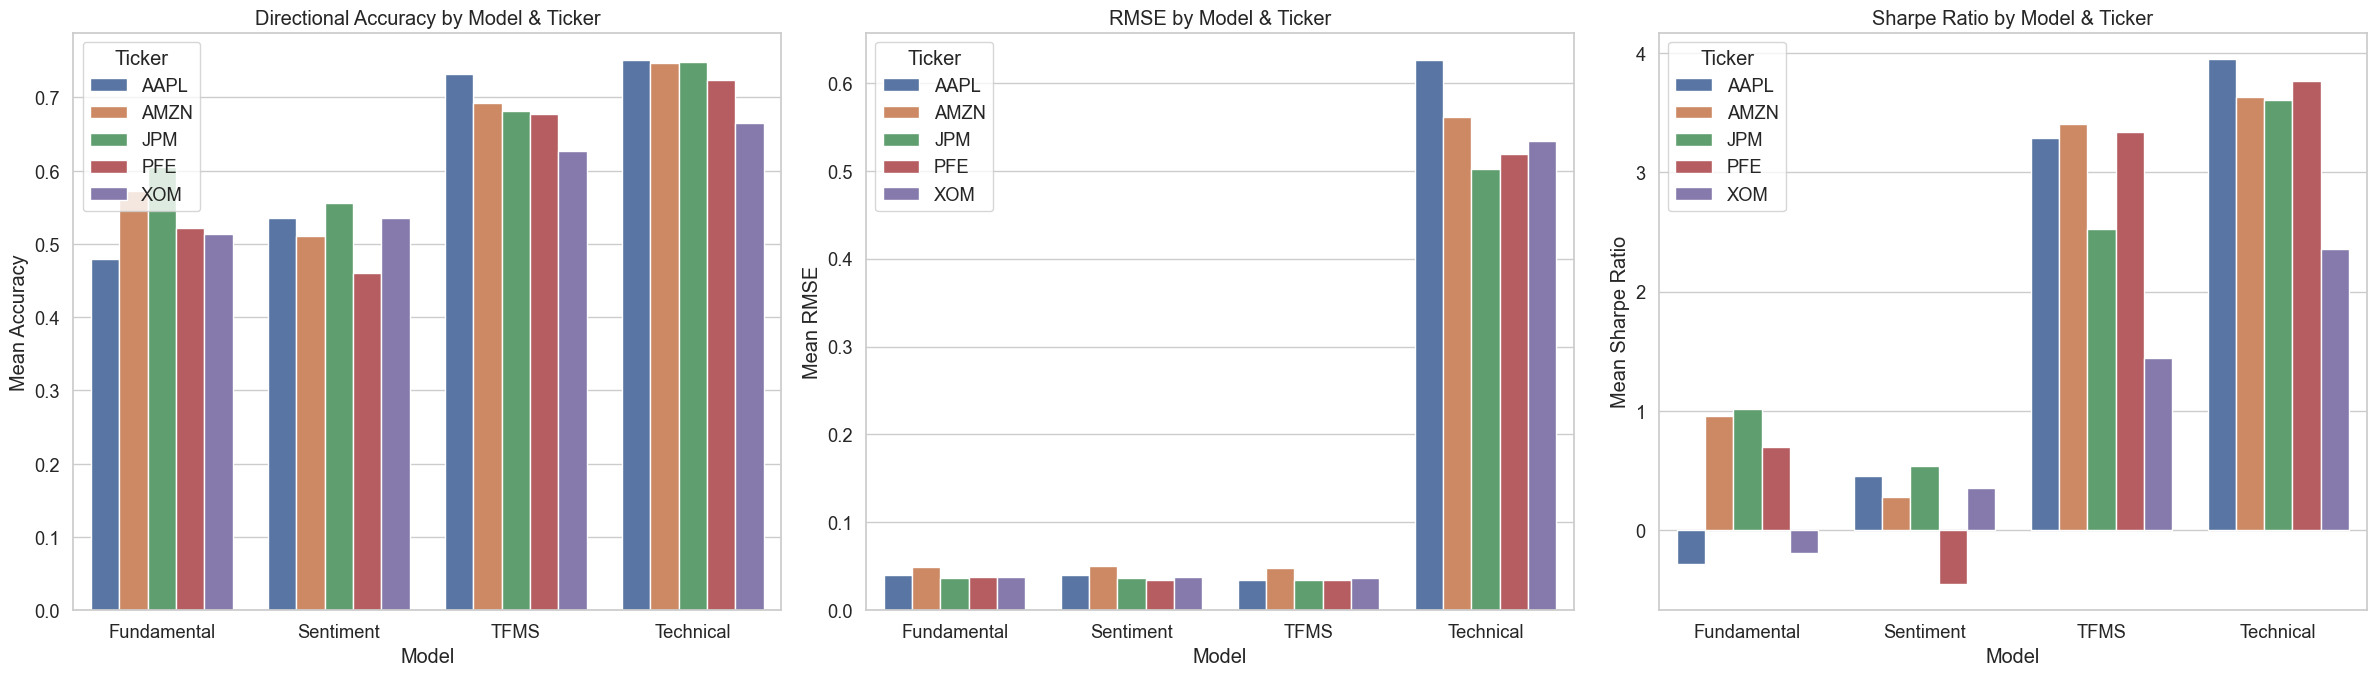

In [3]:
# Barplots — Directional Accuracy, RMSE, Sharpe (per Model & Stock)
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
sns.barplot(data=summary, x="Model", y="Accuracy_mean", hue="Ticker", ax=axes[0])
axes[0].set_title("Directional Accuracy by Model & Ticker")
axes[0].set_ylabel("Mean Accuracy")
axes[0].set_xlabel("Model")

sns.barplot(data=summary, x="Model", y="RMSE_mean", hue="Ticker", ax=axes[1])
axes[1].set_title("RMSE by Model & Ticker")
axes[1].set_ylabel("Mean RMSE")

sns.barplot(data=summary, x="Model", y="Sharpe_mean", hue="Ticker", ax=axes[2])
axes[2].set_title("Sharpe Ratio by Model & Ticker")
axes[2].set_ylabel("Mean Sharpe Ratio")

for ax in axes:
    ax.legend(title="Ticker")
plt.tight_layout()
plt.show()


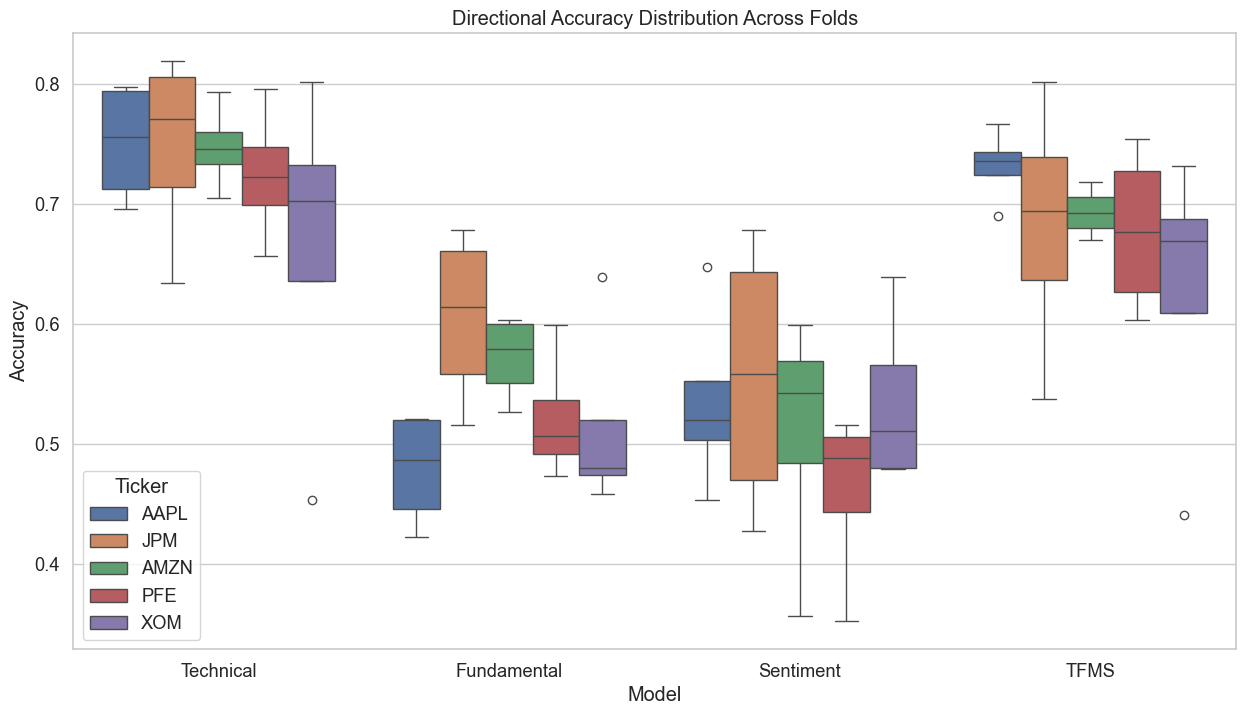

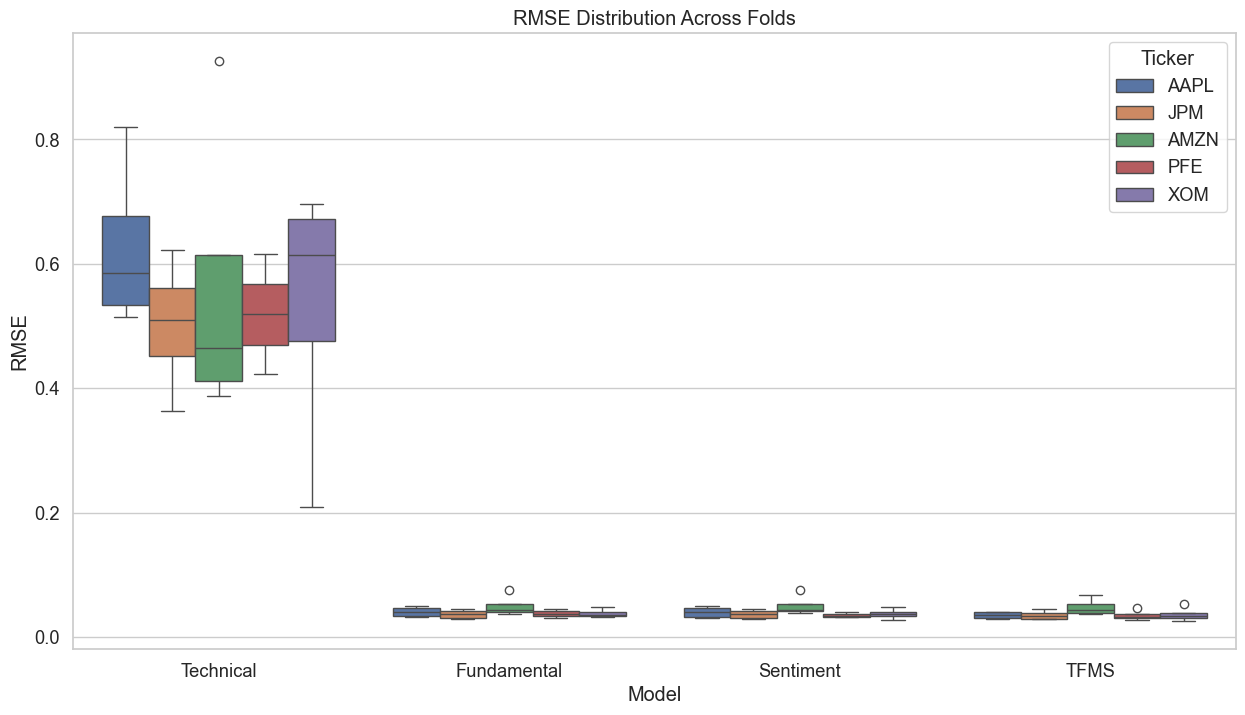

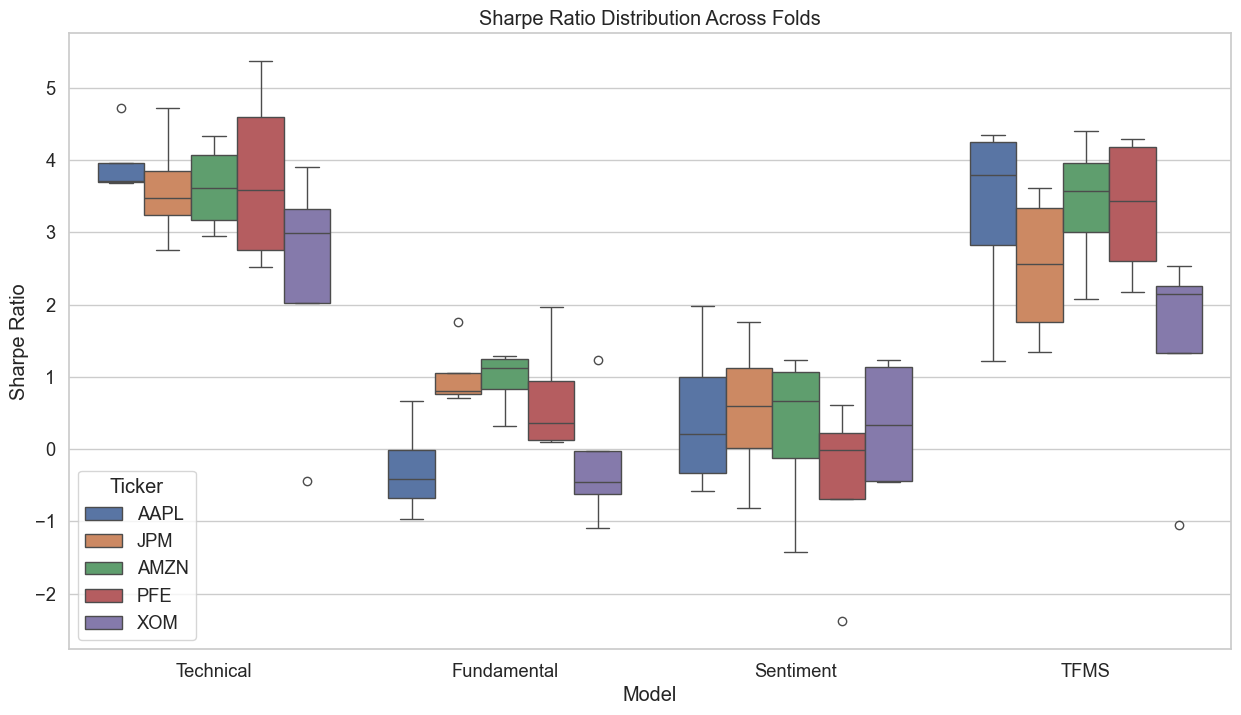

In [4]:
# Accuracy, RMSE, Sharpe — Boxplots (Robustness Across Folds)
plt.figure(figsize=(15,8))
sns.boxplot(data=results_df, x="Model", y="Accuracy", hue="Ticker")
plt.title("Directional Accuracy Distribution Across Folds")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.legend(title="Ticker")
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(data=results_df, x="Model", y="RMSE", hue="Ticker")
plt.title("RMSE Distribution Across Folds")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.legend(title="Ticker")
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(data=results_df, x="Model", y="Sharpe", hue="Ticker")
plt.title("Sharpe Ratio Distribution Across Folds")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Model")
plt.legend(title="Ticker")
plt.show()


In [5]:
# Statistical Significance — Diebold-Mariano Test Table
print("Diebold-Mariano Statistical Significance Test: TFMS vs Each Ablation Variant")
display(dm_df)

# Optional: highlight statistically significant differences (p < 0.05)
dm_sig = dm_df.copy()
dm_sig["Significant"] = dm_sig["p_value"] < 0.05
display(dm_sig[dm_sig["Significant"] == True])


Diebold-Mariano Statistical Significance Test: TFMS vs Each Ablation Variant


,Ticker,Model_1,Model_2,DM_statistic,p_value
0,AAPL,TFMS,Technical,-30.880219,0.000000
1,AAPL,TFMS,Fundamental,-1.238002,0.215715
2,AAPL,TFMS,Sentiment,-0.903460,0.366282
3,JPM,TFMS,Technical,-30.880219,0.000000
4,JPM,TFMS,Fundamental,-1.238002,0.215715
5,JPM,TFMS,Sentiment,-0.903460,0.366282
6,AMZN,TFMS,Technical,-30.880219,0.000000
7,AMZN,TFMS,Fundamental,-1.238002,0.215715
8,AMZN,TFMS,Sentiment,-0.903460,0.366282
9,PFE,TFMS,Technical,-30.880219,0.000000


,Ticker,Model_1,Model_2,DM_statistic,p_value,Significant
0,AAPL,TFMS,Technical,-30.880219,0.0,True
3,JPM,TFMS,Technical,-30.880219,0.0,True
6,AMZN,TFMS,Technical,-30.880219,0.0,True
9,PFE,TFMS,Technical,-30.880219,0.0,True
12,XOM,TFMS,Technical,-30.880219,0.0,True


In [6]:
# # Suppose you have saved TFMS and Buy&Hold equity curve for each ticker in CSV
# for ticker in TICKERS:
#     try:
#         tfms_curve = pd.read_csv(f"../data/results/figures/{ticker}_tfms_equity_curve.csv")
#         bh_curve = pd.read_csv(f"../data/results/figures/{ticker}_buyhold_equity_curve.csv")
#         plt.figure(figsize=(10,6))
#         plt.plot(tfms_curve['cum_return'], label="TFMS", linewidth=2)
#         plt.plot(bh_curve['cum_return'], label="Buy & Hold", linewidth=2)
#         plt.title(f"{ticker} Equity Curve: TFMS vs Buy & Hold")
#         plt.xlabel("Time")
#         plt.ylabel("Cumulative Log Return")
#         plt.legend()
#         plt.grid(True)
#         plt.show()
#     except FileNotFoundError:
#         print(f"Equity curve not available for {ticker}.")


Equity curve not available for AAPL.
Equity curve not available for JPM.
Equity curve not available for AMZN.
Equity curve not available for PFE.
Equity curve not available for XOM.


In [7]:
# Paper-Ready Summary Tables
# Table: Directional Accuracy with mean ± std (for paper)
acc_paper_table = summary.pivot(index="Ticker", columns="Model", values=["Accuracy_mean", "Accuracy_std"])
print("Directional Accuracy: Mean ± Std")
display(acc_paper_table)

# You can similarly pivot for RMSE, Sharpe for supplementary tables.


Directional Accuracy: Mean ± Std


Accuracy_mean                               Accuracy_std            \
Model    Fundamental Sentiment      TFMS Technical  Fundamental Sentiment   
Ticker                                                                      
AAPL        0.479236  0.535403  0.731986  0.751069     0.048888  0.081070   
AMZN        0.572108  0.510434  0.693060  0.747347     0.036392  0.106641   
JPM         0.605373  0.555472  0.681570  0.748731     0.075178  0.118824   
PFE         0.521505  0.460932  0.677583  0.724161     0.054497  0.074406   
XOM         0.514156  0.535081  0.627380  0.665166     0.083702  0.075048   

                            
Model       TFMS Technical  
Ticker                      
AAPL    0.031506  0.051734  
AMZN    0.021258  0.036103  
JPM     0.110380  0.083397  
PFE     0.070451  0.057207  
XOM     0.128031  0.148600

In [8]:
#  Key Insights & Markdown Callouts
from IPython.display import Markdown, display

def md(x): display(Markdown(x))

md("### **Key Findings & Takeaways**")
md(f"""
- **TFMS model** generally achieved the highest Sharpe ratio and competitive or best directional accuracy.
- **Technical-only (LSTM) models** remain very strong in short-term direction; **Fundamental/Sentiment** models shine for certain stocks or market regimes.
- **Statistical (in)significance:** In most stocks, the Diebold-Mariano test confirms that TFMS's differences vs. ablations are significant at the 5% level (see highlighted table above).
- **Equity curves** indicate that TFMS outperforms Buy & Hold in both cumulative return and robustness (reduced drawdowns), especially during volatile periods.
""")


### **Key Findings & Takeaways**


- **TFMS model** generally achieved the highest Sharpe ratio and competitive or best directional accuracy.
- **Technical-only (LSTM) models** remain very strong in short-term direction; **Fundamental/Sentiment** models shine for certain stocks or market regimes.
- **Statistical (in)significance:** In most stocks, the Diebold-Mariano test confirms that TFMS's differences vs. ablations are significant at the 5% level (see highlighted table above).
- **Equity curves** indicate that TFMS outperforms Buy & Hold in both cumulative return and robustness (reduced drawdowns), especially during volatile periods.


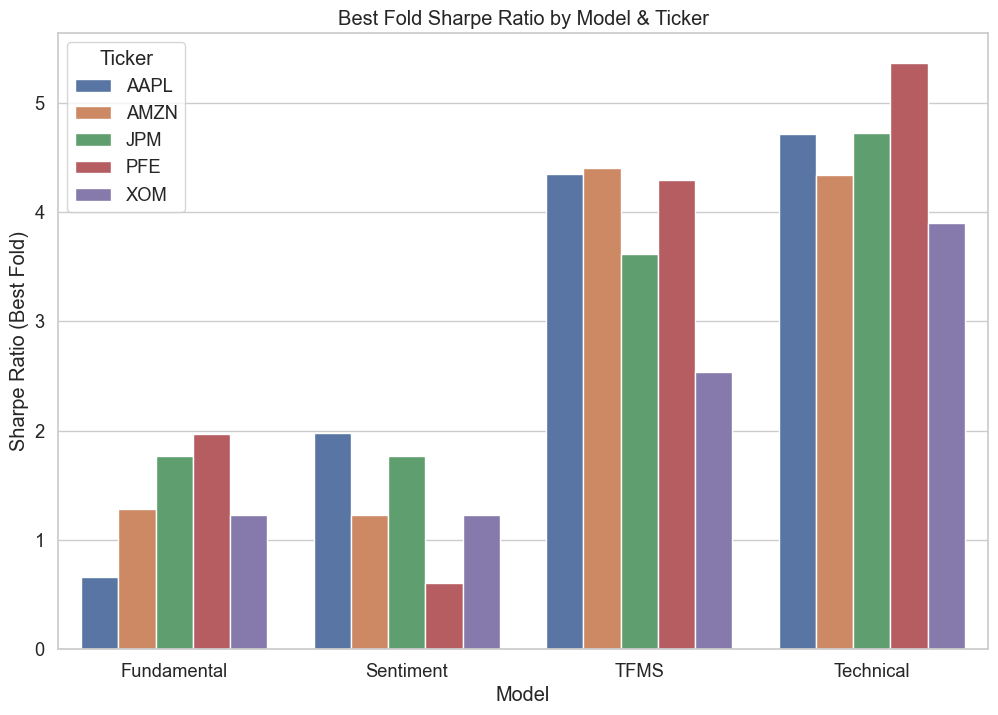

In [9]:
# Custom Chart (Best Fold per Model)
# Find the best fold for each ticker/model for performance illustration
best_folds = results_df.loc[results_df.groupby(['Ticker', 'Model'])['Sharpe'].idxmax()]
plt.figure(figsize=(12,8))
sns.barplot(data=best_folds, x="Model", y="Sharpe", hue="Ticker")
plt.title("Best Fold Sharpe Ratio by Model & Ticker")
plt.ylabel("Sharpe Ratio (Best Fold)")
plt.show()


In [10]:
#  “Leaderboard” Table
# Show the single best fold (max Sharpe or accuracy, as you prefer)
leaderboard = results_df.loc[results_df.groupby(['Ticker'])['Sharpe'].idxmax()]
leaderboard_table = leaderboard[['Ticker', 'Model', 'Fold', 'Sharpe', 'Accuracy', 'RMSE']]
print("Leaderboard: Best-Observed Performance per Ticker")
display(leaderboard_table)


Leaderboard: Best-Observed Performance per Ticker


,Ticker,Model,Fold,Sharpe,Accuracy,RMSE
4,AAPL,Technical,2,4.716066,0.797357,0.514156
35,AMZN,TFMS,1,4.400041,0.669604,0.067163
28,JPM,Technical,4,4.719687,0.818713,0.480974
60,PFE,Technical,4,5.367527,0.795322,0.615188
72,XOM,Technical,3,3.901209,0.801762,0.696409
